<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/POM_Locations_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locations List

---



### Express Freight Management Port Moresby

## Data Preparation

Import necessary libraries

In [1]:
# Install dependencies, uncomment if required
#!pip install osmnx
#!pip install wktplot

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
from shapely import wkt
from shapely.geometry import Polygon, LineString, Point
# import osmnx as ox
# import networkx as nx
# from wktplot import WKTPlot

from google.colab import drive
from google.colab import files

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Uncomment if required

In [3]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_csv('drive/MyDrive/Colab_Data/EFM_PNG_Location_List.csv',dtype={'Wkt': str,})
print(data.shape)
# data['ID'] = data['ID'].astype(int)
# data.set_index('ID', inplace=True)

(1553, 5)


In [5]:
data.head(5).transpose()

,0,1,2,3,4
Name,Kekam Transport Yard,VACANT LAND,"Mainland Holdings, Speybank St",Tyres 4 U,Asinghu Trading
Type,Customer,Customer,Customer,Customer,Customer
Address,"Independence Dr, Lae, Papua New Guinea","Independence Dr, Lae, Papua New Guinea",Papua New Guinea,Papua New Guinea,"Lae, Morobe, Papua New Guinea"
Radius,0,0,0,0,0
Wkt,"POLYGON ((147.022419519399 -6.69109807377267, ...","POLYGON ((147.02149450779 -6.69151939988964, 1...","POLYGON ((146.993316650391 -6.7377686500549, 1...","POLYGON ((146.989967823029 -6.73722776043336, ...","POLYGON ((147.000076293945 -6.70483636856079, ..."


In [6]:
# Empty/NA cells
data.isnull().any()

Name       False
Type       False
Address     True
Radius     False
Wkt        False
dtype: bool

In [7]:
# Drop no necessary columns
# data.drop(columns=[''], inplace=True)

In [8]:
# Drop rows with Empty/NA cells uncomment if required
# data = data.dropna(axis=0)
print(data.shape)
data.isnull().any()

(1553, 5)


Name       False
Type       False
Address     True
Radius     False
Wkt        False
dtype: bool

In [9]:
data.dtypes

Name       object
Type       object
Address    object
Radius      int64
Wkt        object
dtype: object

In [10]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
Name,1553,1553,Kekam Transport Yard,1
Type,1553,7,Other,910
Address,1543,311,Papua New Guinea,285
Wkt,1553,1552,POINT (146.290496826172 -6.37809801101685),2


In [11]:
data[data['Address'].isnull()]

,Name,Type,Address,Radius,Wkt
259,LAE AVIAT CLUB,Customer,NaN,0,"POLYGON ((147.001693725586 -6.72349882125854, ..."
270,Nosrida MIC,Customer,NaN,37,POINT (147.028701782227 -6.70356607437134)
287,Zenag Workshop 2,Customer,NaN,0,"POLYGON ((146.61279296875 -6.92919921875, 146...."
350,Rabtrad – Mangola St,Customer,NaN,0,"POLYGON ((146.989715695381 -6.73436428804997, ..."
399,NCI Packaging,Customer,NaN,0,"POLYGON ((146.987411499023 -6.67916917800903, ..."
474,DESH BESH ENTERPRICE - GORDONS,Customer,NaN,0,"POLYGON ((147.194990515709 -9.44183867165308, ..."
527,Morata Cash Customer,Customer,NaN,34,POINT (147.18752592802 -9.40563594941799)
531,Table Birds Atzera Farm,Customer,NaN,953,POINT (146.307350993156 -6.3250237681543)
600,Service Station IP,Other,NaN,0,"POLYGON ((146.990359425545 -6.7245937267525, 1..."
1077,Lae Top Ace LTD,Other,NaN,0,"POLYGON ((146.988204956055 -6.72824907302856, ..."


Other             910
Customer          560
RestStop           37
Site               20
NoGoZone           10
FuelStop            8
StreetPolyLine      8
Name: Type, dtype: int64


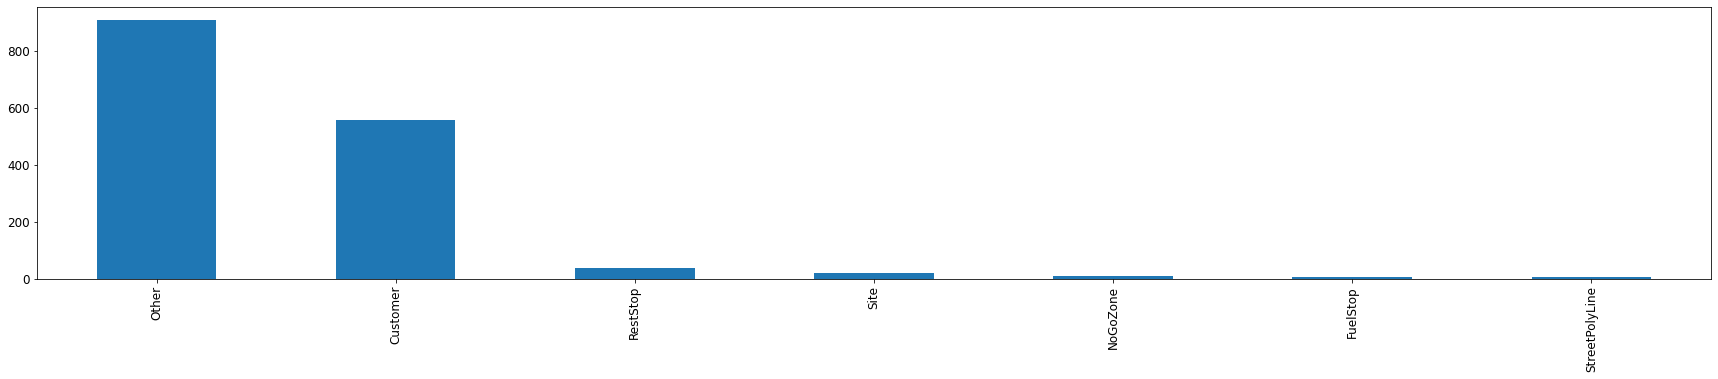

In [12]:
# Location Type Counts
print(data['Type'].value_counts())
data['Type'].value_counts().plot.bar(figsize = [30, 5], fontsize = 12)

In [13]:
# Use Shapely wkt loads to extract centroid coordinates
g = wkt.loads(data['Wkt'][0])
print(g.centroid)
print(g.centroid.coords[0][0]) 
print(g.centroid.coords[0][1]) 


POINT (147.0231297390201 -6.691204200536614)
147.0231297390201
-6.691204200536614


In [14]:
# Loop trough the dataset to extract centroids cordinates
Lat = []
Lon = []
Gtype = []
Json = []

for i in range(len(data)):
  try:
    g = wkt.loads(data['Wkt'][i])
    Json.append(g.__geo_interface__)
    Gtype.append(g.geom_type)
    Lat.append(g.centroid.coords[0][1])
    Lon.append(g.centroid.coords[0][0])
    
  except AttributeError:
    # print('Cannot Extract Centroid')
    Lat.append(np.nan)
    Lon.append(np.nan)
    Gtype.append(np.nan)
    Json.append(np.nan)

data['Latitude'] = Lat
data['Longitude'] = Lon
data['Geometry Type'] = Gtype
data['GeoJson'] = Json


In [15]:
data.head()

,Name,Type,Address,Radius,Wkt,Latitude,Longitude,Geometry Type,GeoJson
0,Kekam Transport Yard,Customer,"Independence Dr, Lae, Papua New Guinea",0,"POLYGON ((147.022419519399 -6.69109807377267, ...",-6.691204,147.023130,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0224..."
1,VACANT LAND,Customer,"Independence Dr, Lae, Papua New Guinea",0,"POLYGON ((147.02149450779 -6.69151939988964, 1...",-6.691971,147.021196,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0214..."
2,"Mainland Holdings, Speybank St",Customer,Papua New Guinea,0,"POLYGON ((146.993316650391 -6.7377686500549, 1...",-6.738901,146.993374,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9933..."
3,Tyres 4 U,Customer,Papua New Guinea,0,"POLYGON ((146.989967823029 -6.73722776043336, ...",-6.737633,146.989697,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9899..."
4,Asinghu Trading,Customer,"Lae, Morobe, Papua New Guinea",0,"POLYGON ((147.000076293945 -6.70483636856079, ...",-6.704879,147.000157,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0000..."


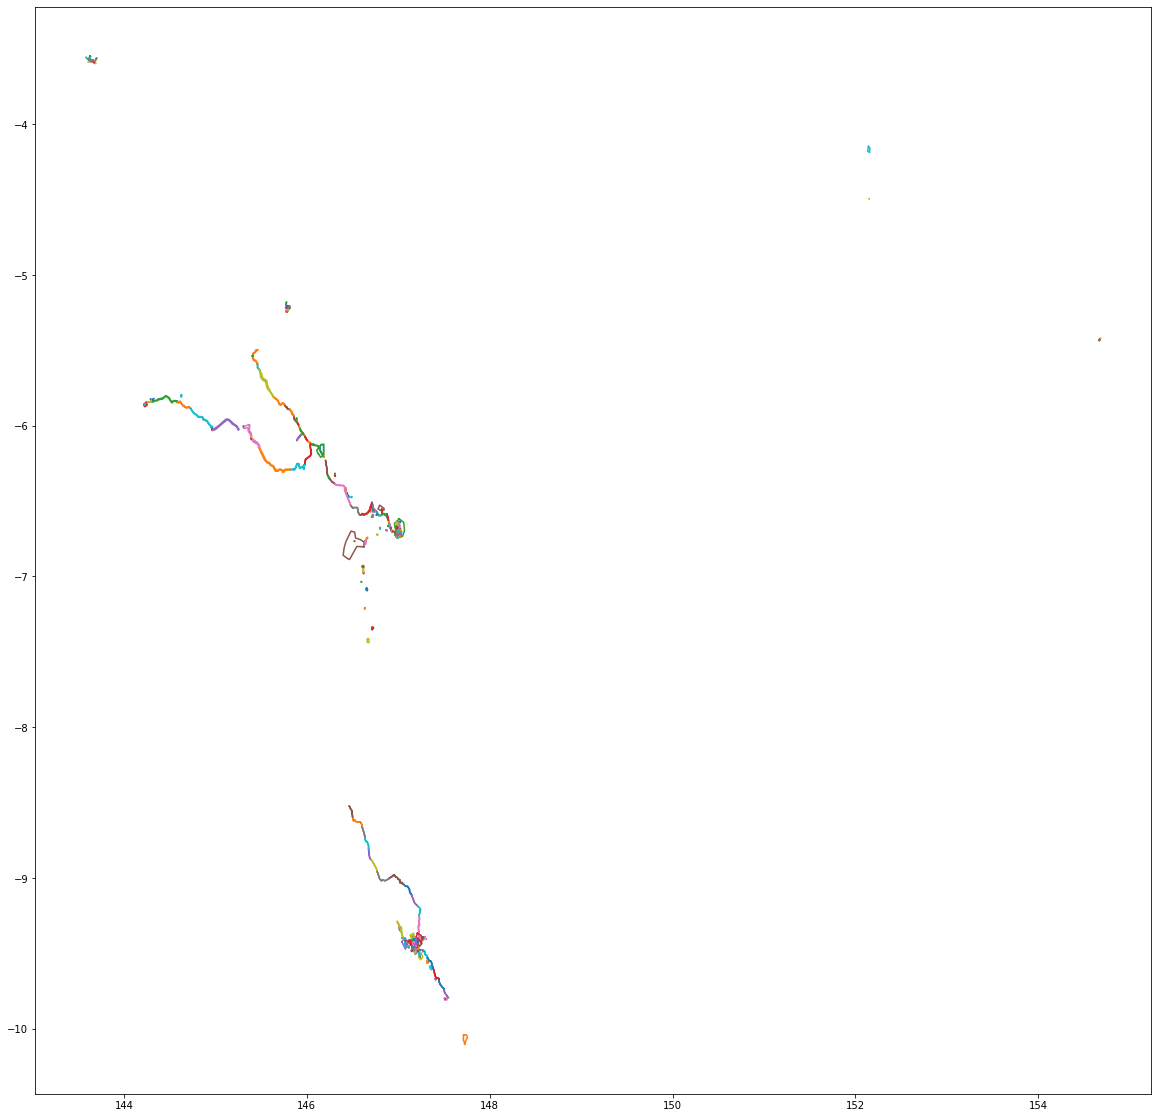

In [16]:
# Loop trough the dataset to plot polygons

for i in range(len(data)):
    g = wkt.loads(data['Wkt'][i])
    if g.geom_type == 'Polygon':
      plt.plot(*g.exterior.xy)

fig = plt.gcf()
fig.set
fig.set_size_inches(20, 20)
fig.savefig('Polygonslocations.png', dpi=500, linewidth=0.01)

plt.show()

In [17]:
# Save the reduced dataset to an CSV file
data.to_csv('EFM_POM_Locations.csv')
!cp EFM_POM_Locations.csv "/content/drive/My Drive/Colab_Data/"

## Geolocation Data

In [18]:
# Install necessary Libraries, uncomment if required
!pip install folium
import folium # map rendering library
from folium import plugins

import matplotlib.cm as cm
import matplotlib.colors as colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Create a new Dataframe for Unique Customers
customers = data[data.Type == 'Customer']
customers

,Name,Type,Address,Radius,Wkt,Latitude,Longitude,Geometry Type,GeoJson
0,Kekam Transport Yard,Customer,"Independence Dr, Lae, Papua New Guinea",0,"POLYGON ((147.022419519399 -6.69109807377267, ...",-6.691204,147.023130,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0224..."
1,VACANT LAND,Customer,"Independence Dr, Lae, Papua New Guinea",0,"POLYGON ((147.02149450779 -6.69151939988964, 1...",-6.691971,147.021196,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0214..."
2,"Mainland Holdings, Speybank St",Customer,Papua New Guinea,0,"POLYGON ((146.993316650391 -6.7377686500549, 1...",-6.738901,146.993374,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9933..."
3,Tyres 4 U,Customer,Papua New Guinea,0,"POLYGON ((146.989967823029 -6.73722776043336, ...",-6.737633,146.989697,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9899..."
4,Asinghu Trading,Customer,"Lae, Morobe, Papua New Guinea",0,"POLYGON ((147.000076293945 -6.70483636856079, ...",-6.704879,147.000157,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0000..."
...,...,...,...,...,...,...,...,...,...
555,SNS North Waigani,Customer,Papua New Guinea,0,"POLYGON ((147.182586669922 -9.42518520355225, ...",-9.424892,147.182204,Polygon,"{'type': 'Polygon', 'coordinates': (((147.1825..."
556,P11 Site Explosive Compound Orica.,Customer,"Morobe Province, Papua New Guinea",0,"POLYGON ((146.889288425446 -6.66509775339569, ...",-6.664667,146.894677,Polygon,"{'type': 'Polygon', 'coordinates': (((146.8892..."
557,Napisa Trading,Customer,"Milford Haven Rd, Lae, Papua New Guinea",0,"POLYGON ((147.000259961933 -6.70455920003724, ...",-6.704610,147.000584,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0002..."
558,Price Mart,Customer,"9th St, Lae, Papua New Guinea",0,"POLYGON ((146.999986376613 -6.7265649027116, 1...",-6.726686,147.000195,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9999..."


In [20]:
# Create a new Dataframe for Unique Sites
sites = data[data.Type == 'Site']
sites

,Name,Type,Address,Radius,Wkt,Latitude,Longitude,Geometry Type,GeoJson
1525,"EFM IFH Taraka Yard, Orion Rd",Site,"EFM Taraka Yard, Orion Rd",0,"POLYGON ((146.988288760185 -6.68099939722045, ...",-6.681273,146.988078,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9882..."
1526,Vabukori,Site,"Port Moresby, Australia",0,"POLYGON ((147.183194160461 -9.49896888820446, ...",-9.500570,147.187522,Polygon,"{'type': 'Polygon', 'coordinates': (((147.1831..."
1527,Primus Runs - Taurama Rd,Site,Papua New Guinea,0,"POLYGON ((147.213668823242 -9.48363590240479, ...",-9.483625,147.213305,Polygon,"{'type': 'Polygon', 'coordinates': (((147.2136..."
1528,Timini Highway,Site,"Unnamed Road, Papua New Guinea",0,"POLYGON ((146.650743484497 -6.75249311238336, ...",-6.771603,146.643910,Polygon,"{'type': 'Polygon', 'coordinates': (((146.6507..."
1529,CCA CDC OFFICE USE BADILI DEPOT,Site,"EFM POM IFH Office, Scratchley Rd, Port Moresb...",0,"POLYGON ((147.175439894199 -9.47968314549538, ...",-9.479308,147.175423,Polygon,"{'type': 'Polygon', 'coordinates': (((147.1754..."
1530,"EFM IFH Office, Malaita St",Site,"EFM IFH Office, Malaita St, Lae, Morobe Provin...",0,"POLYGON ((146.98597535491 -6.73113253950194, 1...",-6.730558,146.985844,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9859..."
1531,EFM Napa Napa Site,Site,"Unnamed Road, Papua New Guinea",0,"POLYGON ((147.075911164284 -9.41468566276346, ...",-9.416319,147.076373,Polygon,"{'type': 'Polygon', 'coordinates': (((147.0759..."
1532,EFM Lae ICD,Site,"Malaita St, Lae, Papua New Guinea",0,"POLYGON ((146.983956992626 -6.73105595752181, ...",-6.730576,146.984639,Polygon,"{'type': 'Polygon', 'coordinates': (((146.9839..."
1533,Mare Highway,Site,Papua New Guinea,0,"POLYGON ((146.656816005707 -6.74509889274248, ...",-6.744267,146.661930,Polygon,"{'type': 'Polygon', 'coordinates': (((146.6568..."
1534,Bangulum landslide road (60 km/h),Site,"Unnamed Road, Papua New Guinea",0,"POLYGON ((146.595575809479 -7.0348261207255, 1...",-7.035898,146.598217,Polygon,"{'type': 'Polygon', 'coordinates': (((146.5955..."


In [21]:
# create a Port Moresby map using latitude and longitude values from locations
map_pom = folium.Map(location=[-9.4,	147.2], zoom_start=12)

# add red markers to map for customers locations
for lat, lon, name in zip(customers['Latitude'], customers['Longitude'], customers['Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_opacity = 1,
        parse_html=False).add_to(map_pom)

# add blue markers to map for sites locations
for lat, lon, name in zip(sites['Latitude'], sites['Longitude'], sites['Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity = 1,
        parse_html=False).add_to(map_pom)
 
map_pom

In [22]:
# Create a dataset where Geometry is Polygons
Polygons = data[data['Geometry Type'] == 'Polygon']

In [23]:
# create a Port Moresby map using latitude and longitude values from locations
map_pom3 = folium.Map(location=[-7,	147], zoom_start=6)

# add Polygons to the map
for geometry, name in zip(Polygons['GeoJson'], Polygons['Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.GeoJson(
        geometry, popup=label,
        ).add_to(map_pom3)

map_pom3   

## Cluster Locations

In [24]:
# Create a new Dataframe for Unique Locations
geo_locations = customers[['Latitude','Longitude']].groupby(['Latitude','Longitude']).count().reset_index()
print(geo_locations.shape)
geo_locations

(560, 2)


,Latitude,Longitude
0,-9.665353,147.424706
1,-9.520634,147.241125
2,-9.508841,147.285376
3,-9.496231,147.185812
4,-9.492473,147.222561
...,...,...
555,-3.566812,143.618968
556,-3.565235,143.629862
557,-3.563597,143.605133
558,-3.553091,143.624941


In [25]:
# set number of clusters
kclusters = 100

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=42).fit(geo_locations)

# check how many cluster labels were generated for each row in the dataframe
print(len(kmeans.labels_))

# add Region labels
geo_locations.insert(0, 'Region', kmeans.labels_)
geo_locations.head()

560


,Region,Latitude,Longitude
0,20,-9.665353,147.424706
1,36,-9.520634,147.241125
2,64,-9.508841,147.285376
3,41,-9.496231,147.185812
4,58,-9.492473,147.222561


In [26]:
# create a Port Moresby map using latitude and longitude values from locations
map_pom2 = folium.Map(location=[-9.4,	147.2], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, region in zip(geo_locations['Latitude'], geo_locations['Longitude'], geo_locations['Region']):
    label = folium.Popup('Region '+ str(region), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color=rainbow[region-1],
        fill=True,
        fill_color=rainbow[region-1],
        fill_opacity=1).add_to(map_pom2)
       
map_pom2